In [57]:
#!pip install catboost

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np



%matplotlib inline

In [59]:
df = pd.read_csv('Fertilizer Prediction.csv')
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


# EDA

In [60]:
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.isnull().sum())

(99, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB
None


Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


In [61]:
print(df['Soil Type'].nunique())
print('\n')
print(df['Crop Type'].nunique())

5


11


In [62]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [63]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [64]:
# Set up Seaborn for better visualizations
sns.set(style="whitegrid")

# Define the columns for each type of visualization
continuous_vars = ['Temparature', 'Humidity ', 'Moisture']
categorical_vars = ['Soil Type', 'Crop Type', 'Fertilizer Name']


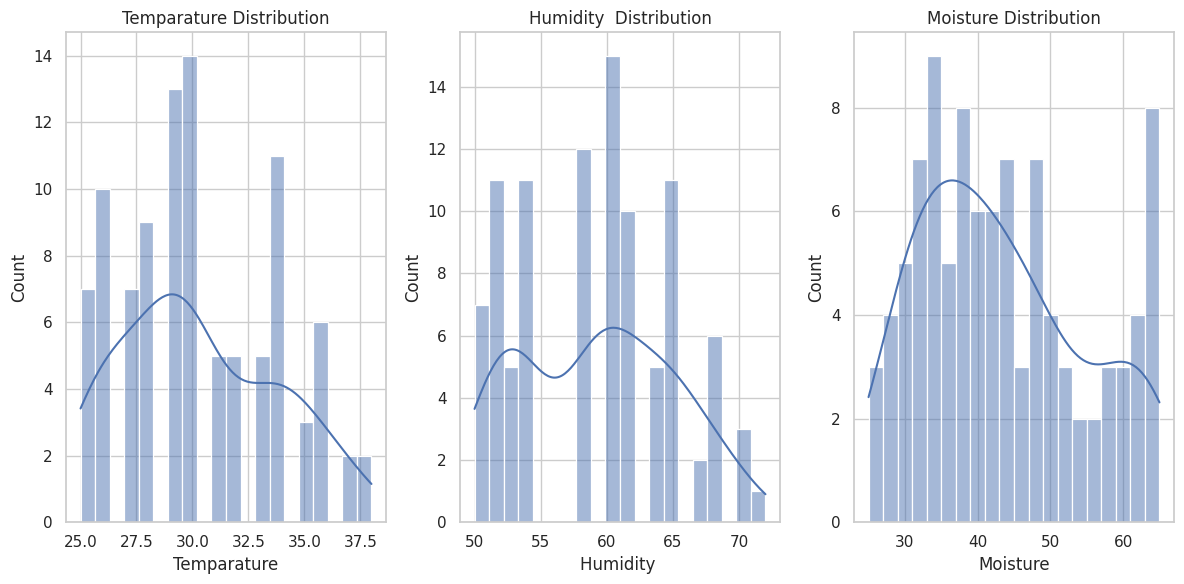

In [65]:
# Create histograms for continuous variables
plt.figure(figsize=(12, 6))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(1, len(continuous_vars), i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


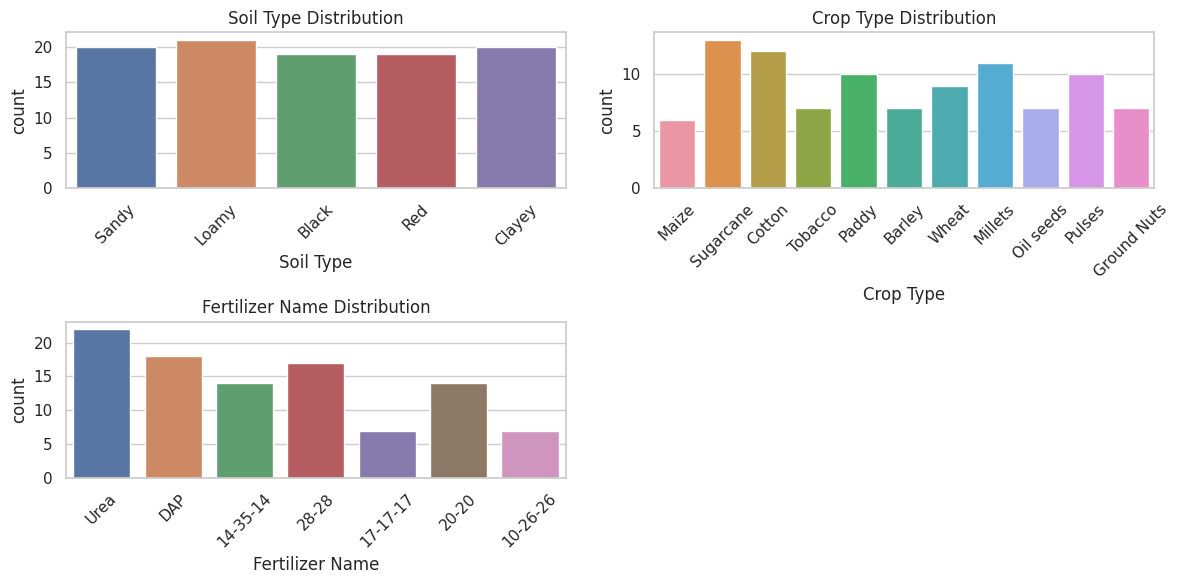

In [66]:
# Create bar plots for categorical variables
num_rows = len(categorical_vars) // 2 + len(categorical_vars) % 2  # Calculate number of rows needed
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

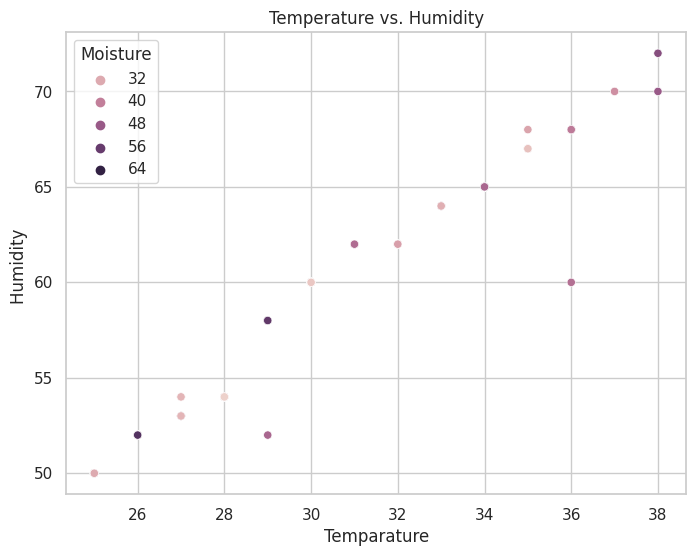

In [67]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Temparature', y='Humidity ', hue='Moisture')
plt.title('Temperature vs. Humidity')
plt.show()

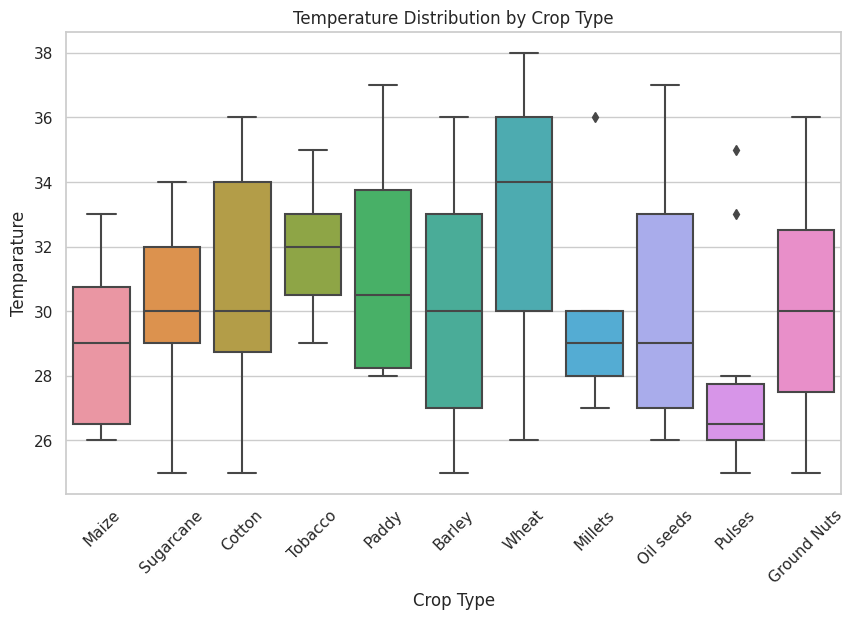

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Crop Type', y='Temparature')
plt.title('Temperature Distribution by Crop Type')
plt.xticks(rotation=45)
plt.show()


In [69]:
#sns.pairplot(df, hue = 'Fertilizer Name')
#plt.suptitle('Pairwise Relationships', y=1.02)
#plt.show()


<ipython-input-70-e51dbb5aa51a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


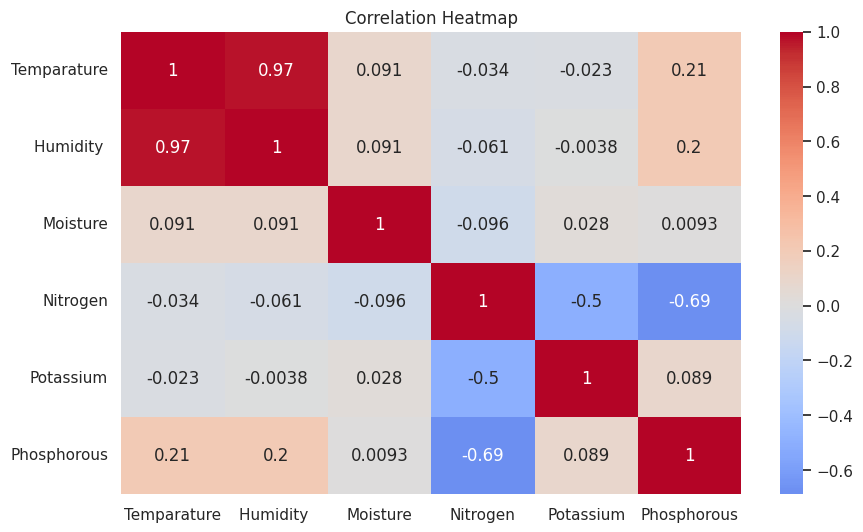

In [70]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


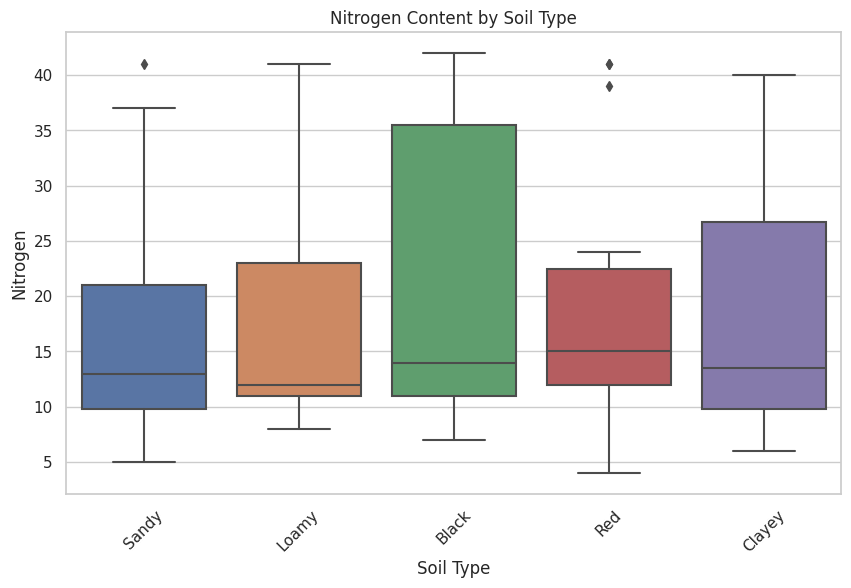

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Soil Type', y='Nitrogen')
plt.title('Nitrogen Content by Soil Type')
plt.xticks(rotation=45)
plt.show()


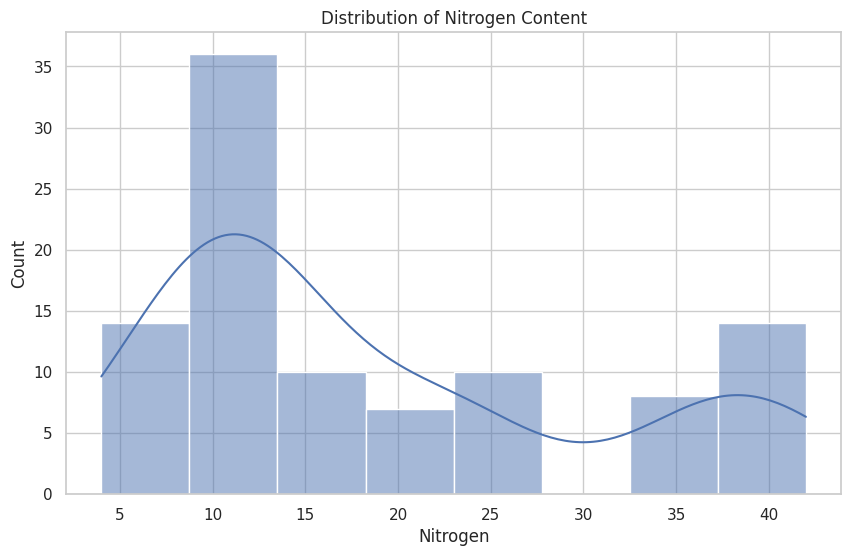

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Nitrogen'], kde=True)
plt.title('Distribution of Nitrogen Content')
plt.show()


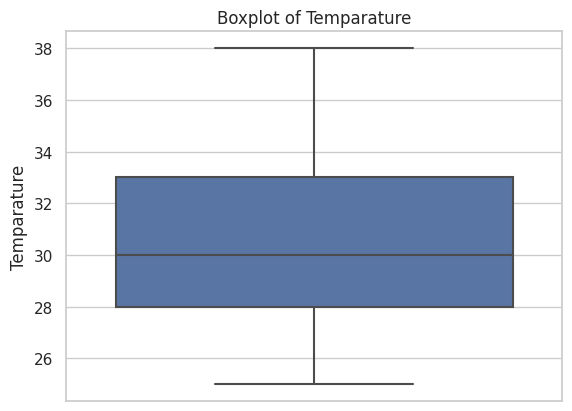

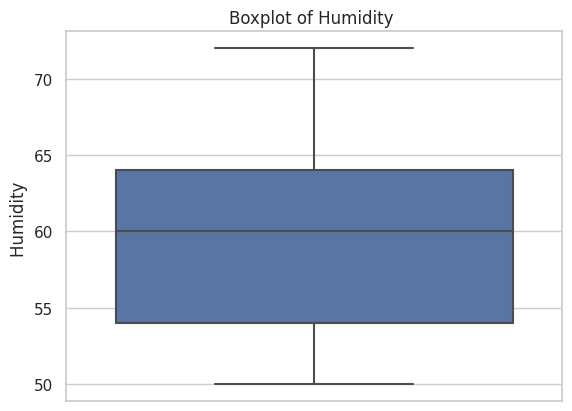

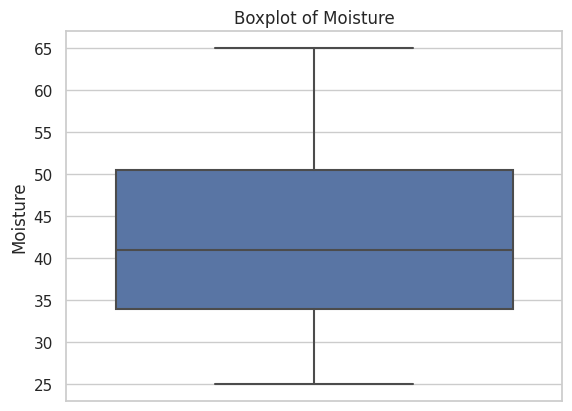

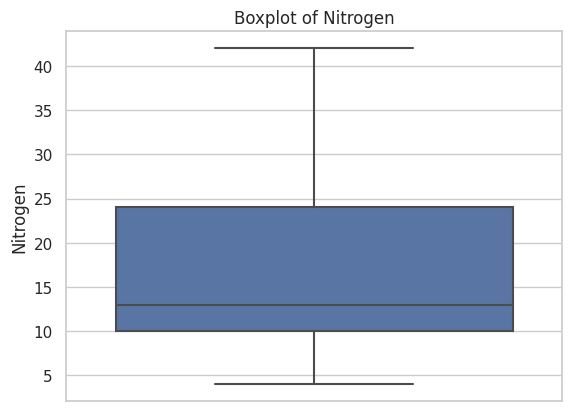

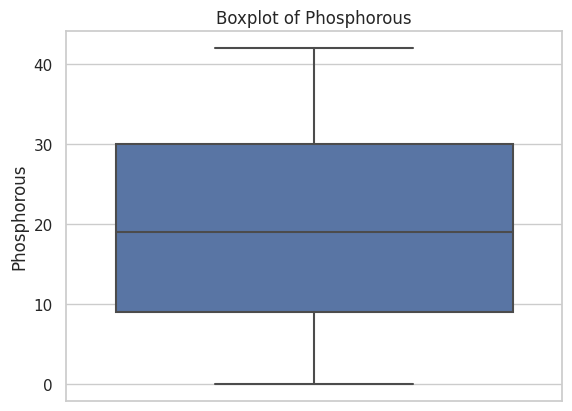

In [73]:
numeric_columns = ['Temparature',	'Humidity ', 'Moisture',	'Nitrogen',	'Phosphorous']
for col in numeric_columns:
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [74]:
categorical_columns = ['Soil Type', 'Crop Type', 'Fertilizer Name']
for col in categorical_columns:
    unique_vals = df[col].unique()
    print(f'{col}: {unique_vals}')


Soil Type: ['Sandy' 'Loamy' 'Black' 'Red' 'Clayey']
Crop Type: ['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']
Fertilizer Name: ['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']


In [75]:
df.duplicated().sum()

0

In [76]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Soil Type', 'Crop Type'], drop_first=True)

In [77]:
# feature engineering
df['Nutrient_Sum'] = df['Nitrogen'] + df['Potassium'] + df['Phosphorous']
df['Temp_Hum_Interact'] = df['Temparature'] * df['Humidity ']

In [78]:
# Create a mapping dictionary for 'Fertilizer Name' labels
fertilizer_mapping = {
    'Urea': 0,
    'DAP': 1,
    '14-35-14': 2,
    '28-28': 3,
    '17-17-17': 4,
    '20-20': 5,
    '10-26-26': 6
}

# Map the categorical labels to numerical values
df['Fertilizer Numerical'] = df['Fertilizer Name'].map(fertilizer_mapping)

# Assuming you have already performed necessary preprocessing
X = df.drop(['Fertilizer Name', 'Fertilizer Numerical'], axis=1)
y = df['Fertilizer Numerical']

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Temparature            99 non-null     int64
 1   Humidity               99 non-null     int64
 2   Moisture               99 non-null     int64
 3   Nitrogen               99 non-null     int64
 4   Potassium              99 non-null     int64
 5   Phosphorous            99 non-null     int64
 6   Soil Type_Clayey       99 non-null     uint8
 7   Soil Type_Loamy        99 non-null     uint8
 8   Soil Type_Red          99 non-null     uint8
 9   Soil Type_Sandy        99 non-null     uint8
 10  Crop Type_Cotton       99 non-null     uint8
 11  Crop Type_Ground Nuts  99 non-null     uint8
 12  Crop Type_Maize        99 non-null     uint8
 13  Crop Type_Millets      99 non-null     uint8
 14  Crop Type_Oil seeds    99 non-null     uint8
 15  Crop Type_Paddy        99 non-null     uin

In [80]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 99 entries, 0 to 98
Series name: Fertilizer Numerical
Non-Null Count  Dtype
--------------  -----
99 non-null     int64
dtypes: int64(1)
memory usage: 920.0 bytes


In [81]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False)
}

# Evaluate models using cross-validation
results = []
for name, model in models.items():
    y_pred = cross_val_predict(model, X, y, cv=5)

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    results.append((name, accuracy, precision, recall, f1))

# Create a DataFrame to display the results
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']
df_results = pd.DataFrame(results, columns=columns)

# Print the results table
print(df_results)

# Find the best model based on the highest accuracy
best_model = df_results.loc[df_results['Accuracy'].idxmax(), 'Model']
print(f"\nBest Model: {best_model}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 79, number of used features: 8
[LightGBM] [Info] Start training from score -1.536235
[LightGBM] [Info] Start training from score -1.661398
[LightGBM] [Info] Start training from score -1.971553
[LightGBM] [Info] Start training from score -1.804498
[LightGBM] [Info] Start training from score -2.577688
[LightGBM] [Info] Start training from score -1.971553
[LightGBM] [Info] Start training from score -2.577688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

In [82]:

# Define the CatBoostClassifier
catboost_model = CatBoostClassifier(verbose=False)  # Set verbose to 0 to turn off the verbose output

# Split your data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Fit the CatBoost model on the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = catboost_model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [83]:
# Make predictions on the training data
y_train_pred = catboost_model.predict(X_train)

# Calculate and print the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)

# Make predictions on the test data
y_test_pred = catboost_model.predict(X_test)

# Calculate and print the testing accuracy
testing_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", testing_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 1.0


                  Feature  Importance
10       Crop Type_Cotton    0.003760
14    Crop Type_Oil seeds    0.023641
16       Crop Type_Pulses    0.074195
15        Crop Type_Paddy    0.074793
19        Crop Type_Wheat    0.080088
12        Crop Type_Maize    0.112189
11  Crop Type_Ground Nuts    0.118908
13      Crop Type_Millets    0.125050
18      Crop Type_Tobacco    0.176979
8           Soil Type_Red    0.256464
6        Soil Type_Clayey    0.267548
9         Soil Type_Sandy    0.321995
17    Crop Type_Sugarcane    0.437452
7         Soil Type_Loamy    0.445060
1               Humidity     1.042903
21      Temp_Hum_Interact    1.108291
2                Moisture    1.284498
0             Temparature    1.502816
20           Nutrient_Sum   12.837276
4               Potassium   21.746873
3                Nitrogen   24.897981
5             Phosphorous   33.061242


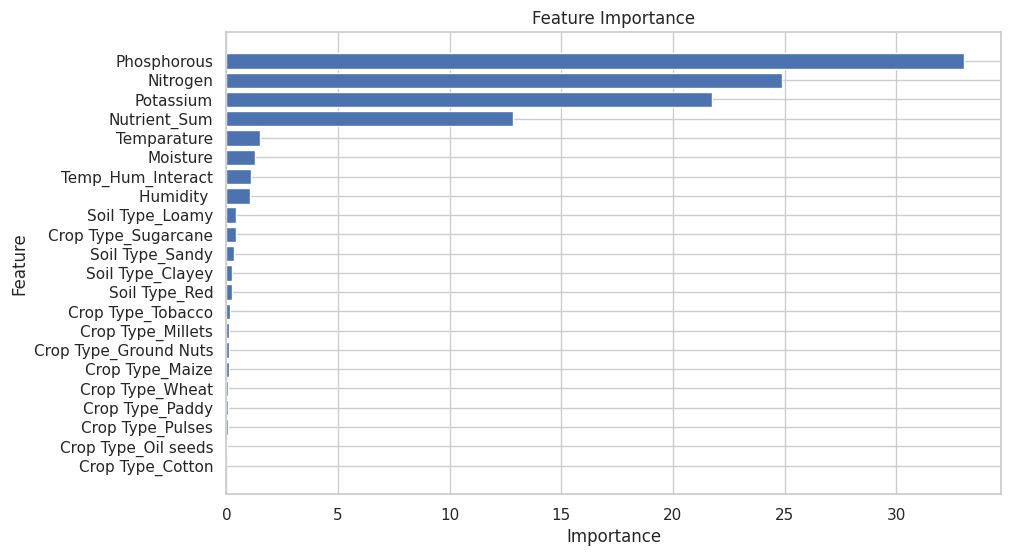

In [87]:
# Get feature importances from the trained CatBoost model
feature_importances = catboost_model.get_feature_importance()

# Create a DataFrame to store feature names and their importances
feature_names = X.columns  # Assuming X is a pandas DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Display the sorted feature importance
print(feature_importance_df)

# Optionally, plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

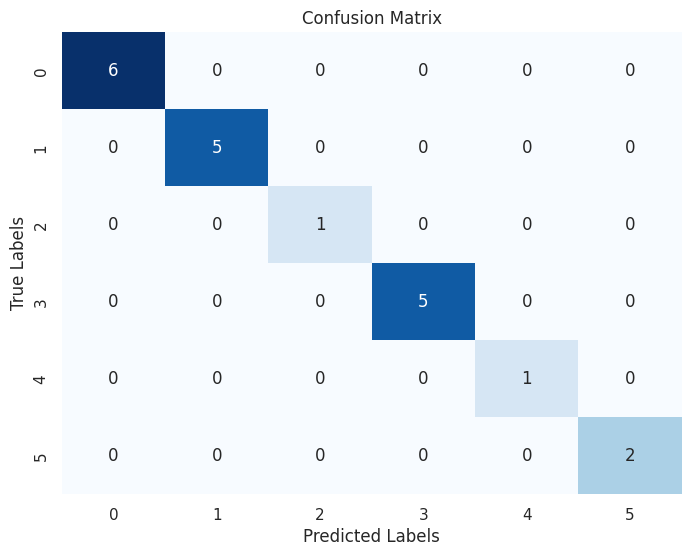

In [85]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [86]:
# Get predicted probabilities for the positive class (class 1) from the model
y_probs = catboost_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under the Curve) score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



ValueError: ignored